### Imports

In [1]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import folium
import pydeck as pdk
import matplotlib.pyplot as plt

In [2]:
INPUT_DIR = '../../data/chelonioidea'
INPUT_CSV = 'sea_turtles_australia.csv'
INPUT_SHP = '../../data/chelonioidea/shapefiles/AUS_adm0/AUS_adm0.shp'

### Data Cleaning

In [3]:
# read csv as dataframe
sea_turtles = pd.read_csv(os.path.join(INPUT_DIR, INPUT_CSV))

In [4]:
# explore data
sea_turtles.head()

,species,locality,occurrenceStatus,decimalLatitude,decimalLongitude,eventDate,year,taxonKey,speciesKey
0,Lepidochelys olivacea,WOONGARRA:OAKS,present,-24.7705,152.4182,12/31/1997 19:00,1998,2442153,2442153
1,Natator depressus,WOONGARRA:RIFLERANGE CK,present,-24.8483,152.4683,12/31/1996 19:00,1997,2442173,2442173
2,Natator depressus,WOONGARRA:NEILSON PK,present,-24.8060,152.4548,12/31/1974 19:00,1975,2442173,2442173
3,Lepidochelys olivacea,ZUNA ISLAND,present,-10.7191,142.2930,12/31/1998 19:00,1999,2442153,2442153
4,Caretta caretta,WOONGARRA:RIFLERANGE CK,present,-24.8483,152.4683,12/31/1997 19:00,1998,8894817,8894817


###  Data Cleaning

In [5]:
# view number of species occurences
sea_turtles['species'].value_counts()

Natator depressus         2100
Lepidochelys olivacea     1875
Eretmochelys imbricata     876
Chelonia mydas             316
Caretta caretta            246
Dermochelys coriacea        10
Name: species, dtype: int64

In [6]:
# rename columns
sea_turtles.columns = ['species', 'locality', 'status', 'latitude',
                      'longitude', 'date', 'year', 'taxonKey',
                      'speciesKey']

# remove nans
sea_turtles = sea_turtles[sea_turtles['longitude'].isna() == False]

In [7]:
sea_turtles

,species,locality,status,latitude,longitude,date,year,taxonKey,speciesKey
0,Lepidochelys olivacea,WOONGARRA:OAKS,present,-24.7705,152.4182,12/31/1997 19:00,1998,2442153,2442153
1,Natator depressus,WOONGARRA:RIFLERANGE CK,present,-24.8483,152.4683,12/31/1996 19:00,1997,2442173,2442173
2,Natator depressus,WOONGARRA:NEILSON PK,present,-24.8060,152.4548,12/31/1974 19:00,1975,2442173,2442173
3,Lepidochelys olivacea,ZUNA ISLAND,present,-10.7191,142.2930,12/31/1998 19:00,1999,2442153,2442153
4,Caretta caretta,WOONGARRA:RIFLERANGE CK,present,-24.8483,152.4683,12/31/1997 19:00,1998,8894817,8894817
...,...,...,...,...,...,...,...,...,...
5418,Natator depressus,unknown,present,-10.2102,142.1448,12/31/1998 19:00,1999,2442173,2442173
5419,Natator depressus,unknown,present,-10.2751,142.0945,12/31/1998 19:00,1999,2442173,2442173
5420,Natator depressus,unknown,present,-10.7173,142.3429,12/31/1998 19:00,1999,2442173,2442173
5421,Natator depressus,unknown,present,-10.2738,142.1037,12/31/1998 19:00,1999,2442173,2442173


### Visualizing with GeoPandas

In [8]:
# collect australia shapefile
australia_shp = '../../data/chelonioidea/shapefiles/AUS_adm0/AUS_adm0.shp'
australia = gpd.read_file(australia_shp)

In [9]:
# convert sea turtles pandas dataframe to geodataframe
sea_turtles_gdf = gpd.GeoDataFrame(
    sea_turtles,
    geometry=gpd.points_from_xy(sea_turtles['longitude'], sea_turtles['latitude']))

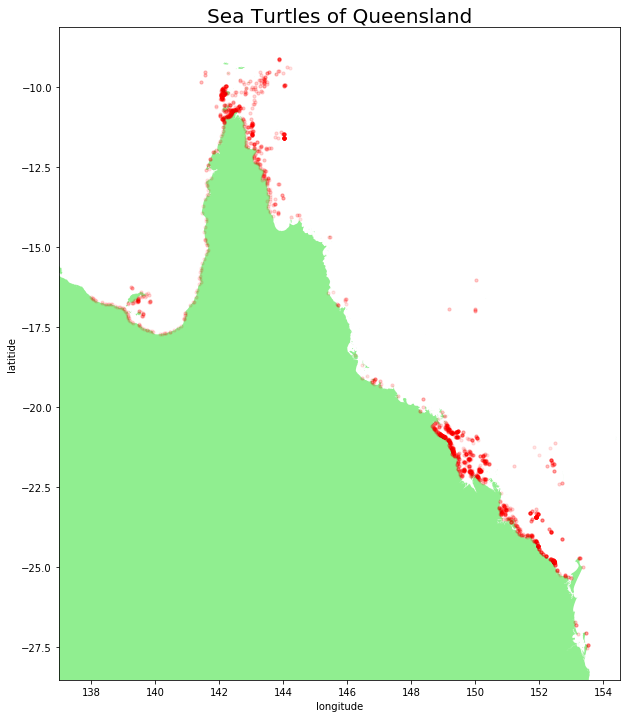

In [10]:
# figure
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1,1,1)

# plot data
australia.plot(ax=ax, color='lightgreen')
sea_turtles_gdf.plot(ax=ax, color='red', markersize=10, alpha=0.05)

# plot aesthetics
ax.set_title('Sea Turtles of Queensland', size=20)
ax.set_xlim([sea_turtles.longitude.min()-1, sea_turtles.longitude.max()+1])
ax.set_ylim([sea_turtles.latitude.min()-1, sea_turtles.latitude.max()+1])
ax.set_xlabel('longitude')
ax.set_ylabel('latitide')

# display
fig.show()

### Visualizing with folium

In [11]:
sea_turtle_map = folium.Map(
    location=[-20, 146], 
    tiles = 'Stamen Terrain',
    zoom_start=6,
)

latitudes = sea_turtles['latitude'].tolist()
longitudes = sea_turtles['longitude'].tolist()

for i in range(0, 500):
    folium.Circle(
        radius=50,
        location=[latitudes[i], longitudes[i]], 
        popup=sea_turtles['locality'].iloc[i],
        color='red',
        fill=True
    ).add_to(sea_turtle_map)
    
sea_turtle_map

### Visualizating with pydeck

In [12]:
# create turtles layer
turtles_layer = pdk.Layer(
    'ScatterplotLayer',
    sea_turtles,
    get_position='[longitude, latitude]',
    get_radius=10000,
    get_fill_color=[180, 0, 200, 140],
    pickable=True
)

In [13]:
# adjust initial view state to Queensland
view_state = pdk.ViewState(
    longitude=150.4960,
    latitude=-19.1523,
    zoom=4.5,
    min_zoom=2,
    max_zoom=6,
    pitch=40.5,
    bearing=-45
)

In [14]:
# mapbox api token
MAPBOX_ACCESS_TOKEN = '[INSET HERE]'

In [15]:
# build the map
turtles_viz = pdk.Deck(layers=[turtles_layer], 
                       initial_view_state=view_state,
                      mapbox_key=MAPBOX_ACCESS_TOKEN)

In [16]:
turtles_viz.to_html('sea_turtles_demo.html')

'/home/paperspace/maanas/repos/sandbox/sea_turtles_demo.html'